## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There are not NA's

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [6]:
print('The numbers of rows is: ', df.shape[0])

The numbers of rows is:  294478


c. The number of unique users in the dataset.

In [7]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [8]:
print('The proportion of users converted: ', df.converted.sum()/df.shape[0] * 100, '%')

The proportion of users converted:  11.96591935560551 %


e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [10]:
group_1 =df[(df.group=='treatment') & (df.landing_page != 'new_page')].shape[0]
group_2 =df[(df.group=='control') & (df.landing_page != 'old_page')].shape[0]
group_1 +group_2

3893

f. Do any of the rows have missing values?

In [11]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There are not missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 =df[((df.group=='control') & (df.landing_page == 'old_page')) |
  ((df.group=='treatment') & (df.landing_page == 'new_page'))]
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
print(' The number of unique user_id are: ', df2.user_id.nunique())

 The number of unique user_id are:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**The repeated user_id is 773192**

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
#The row information of the repeat user_id is 2893 is:
df2[df2['user_id'] == 773192].tail(1)

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
# I'm going to remove the 1899 row
df2.drop([1899], inplace =True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.user_id.duplicated()]

<ipython-input-17-b78fa9eba079>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop([1899], inplace =True)


,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.sum()/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2.groupby(['group']).agg({'converted': 'mean'})

,converted
group,
control,0.120386
treatment,0.118808


c. Given that an individual was in the `treatment` group, what is the probability they converted?

0.118808

d. What is the probability that an individual received the new page?

In [20]:
df2[df2['landing_page'] == 'new_page'].shape[0]/ df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

### There is only a small difference in the conversion rate between the two groups. The conversion rate of the control group is 0.1204 and the treatment group is 0.1188. There is not enough evidence to say that the new treatment page generates more conversions given the very small probability difference between them. To make a decision, whether or not to implement the new page; we need to define our test hypothesis and calculate the p-value for the new and old pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}:$** **$p_{new}$** - **$p_{old}$** <= 0

**$H_{1}:$** **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# According with the instructions there is not difference between the 
#conversion rates of old and new page, so the all dataset is used to 
#calculate the convertion rate for the new page.
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
# According with the instructions there is not difference between the 
#conversion rates of old and new page, so the all dataset is used to 
#calculate the convertion rate for the new page.
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new =df2[df2['landing_page'] == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old =df2[df2['landing_page'] == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17460

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17388

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
sample_diff = ( new_page_converted / n_new ) - (old_page_converted / n_old )
sample_diff

0.000465839388924999

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs= []
for _ in range(10000):
    new_page_converted = np.random.binomial( n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diffs.append(new_page_converted/n_new - old_page_converted/n_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

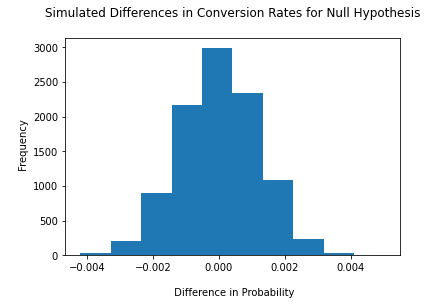

In [29]:
plt.hist(p_diffs)
plt.xlabel('\n Difference in Probability')
plt.ylabel('\n Frequency')
plt.title('Simulated Differences in Conversion Rates for Null Hypothesis\n');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
(np.array(p_diffs )> sample_diff).mean()

0.3547

We can see that 0.9387 % is the proportion of the p_diffs  are greater than the actual difference (sample_diff) observed in ab_data.csv

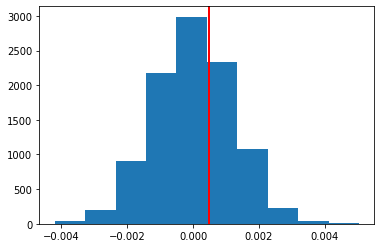

In [31]:
# We draw a vertical line that represents our sample_diff
plt.hist(p_diffs);
plt.axvline(sample_diff, c='r',linewidth = 2);


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### We found that our p-value of looking at the statistic given the null hypothesis as true was 0.9387.
### Since we've set our type 1 error threshold to 5%, and since the p-value we got is much larger than 0.05, we can not reject the null hypothesis in favor of the alternative, so the new landing page doesn't seems to generate a higher conversion rate than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm
df2.head()

C:\Users\sonch\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
C:\Users\sonch\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\sonch\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [33]:
df2.groupby(['landing_page']).agg({'converted': 'sum'}).reset_index()

,landing_page,converted
0,new_page,17264
1,old_page,17489


In [34]:
df2.groupby(['landing_page']).count().reset_index()

,landing_page,user_id,timestamp,group,converted
0,new_page,145310,145310,145310,145310
1,old_page,145274,145274,145274,145274


In [35]:
convert_old = df2.groupby(['landing_page']).agg({'converted': 'sum'}).reset_index()['converted'][1]
convert_new = df2.groupby(['landing_page']).agg({'converted': 'sum'}).reset_index()['converted'][0]
n_old = df2.groupby(['landing_page']).count().reset_index()['converted'][1]
n_new = df2.groupby(['landing_page']).count().reset_index()['converted'][0]

print('\n convert_old = ', convert_old, '\n convert_new = ', convert_new, '\n n_old = ', n_old, '\n n_new = ', n_new)


 convert_old =  17489 
 convert_new =  17264 
 n_old =  145274 
 n_new =  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

print ('z_score = ',z_score)
print('p_value = ', p_value )

z_score =  1.3109241984234394
p_value =  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### We obtained a z-score of 1.3109 which corresponds to a p-value of 0.9050, meaning that approximately 90.50% of the values in our simulated data set are lower than our observed statistic.
### The p_value is greater than the 0.05 significance level. That means we can't be sure at the 95% confidence level that new_page's conversion rate is higher than old_page's.
### We failed to reject the null hypothesis. Therefore, the conclusion is the same as part j.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We going to use Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# creating a intercpt column
df2['intercept'] = 1

# creating dummy columns; 
df2[['ab_page_temp', 'ab_page']] = pd.get_dummies(df2['group'])

# drop ab_page_temp
# ab_page is a dummy variable column, having a value 1 when an individual receives the treatment, otherwise 0
df2.drop(['ab_page_temp'], axis =1 , inplace = True)
df2.head()


<ipython-input-37-25904fabd49a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
<ipython-input-37-25904fabd49a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['ab_page_temp', 'ab_page']] = pd.get_dummies(df2['group'])
<ipython-input-37-25904fabd49a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
log_mod =sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results=log_mod.fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:               8.077e-06
Time:                        07:53:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

* ### Hyotheses associated with regression model:  
 ### **$H_{0}:$** **$p_{new}$** - **$p_{old}$** = 0

 ### **$H_{1}:$** **$p_{new}$** - **$p_{old}$** != 0
 
 
* ### Hyotheses associated with Part II:  
 ### **$H_{0}:$** **$p_{new}$** - **$p_{old}$** <= 0

 ### **$H_{1}:$** **$p_{new}$** - **$p_{old}$** > 0


* ### The p-value for ab_page is 0.190, so is higher than the 0.05, meaning that we can fail to reject the null hypothesis in favor of alternative. There is not evidence of the new page is better than the old page.


* ### The p-values are different because we are performing a two-tailed test in Logistic Regression not a one-tailed test as done in Part II.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* ### There can be many variables that can influence the conversion of the page, such as where it is accessed from, age, gender, religion, income, etc. The inclusion of some of these variables could improve the accuracy of the model.

* ### One of the disadvantages that we must take into account when adding more variables to our model is that we can incur multicollinearity and this reduces the precision of the coefficients of our model and the model becomes more complex. More and more variables could lead to an overfitting of the model.



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

There are 3 countries

In [45]:
### Create the necessary dummy variable
df_new[['CA', 'UK', 'US']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [46]:
# We gonna drop UK colums
df_new.drop('UK', axis = 1, inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


In [47]:
### Fit Your Linear Model And Obtain the Results
log_mod_2 =sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'US', 'CA']])
results_2=log_mod_2.fit() 

results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:               2.323e-05
Time:                        07:54:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

In [48]:
1 / np.exp(-0.0149), 1 / np.exp(-0.0099) , 1/ np.exp(-0.0506)

(1.0150115583846535, 1.009949167117542, 1.0519020483004984)

* ### Since the p-value of the country variables is greater than 5%, it seems that they do not influence the conversion rate of the page, so the country alone is not a statistically significant factor in explaining customer behavior.

* ### This suggests that we fail to reject the Null Hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
# Creating two new columns representing the interaction variables and then running our model.
df_new['page_US'] = df_new['ab_page'] * df_new['US']
df_new['page_CA'] = df_new['ab_page'] * df_new['CA']

# Create a Model including the iteration variables
log_mod_3 = sm.Logit(df_new['converted'], df_new[['intercept','CA','US', 'ab_page', 'page_US', 'page_CA']])
results_3 = log_mod_3.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Dec 2022   Pseudo R-squ.:               3.482e-05
Time:                        07:54:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
page_US       -0.0314      0.027     -1.181      0.238      -0.084       0.021
page_CA       -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

## Conclusions

* ### We see that all the variables have a p-value above 0.05, so we fail to reject the Null Hypothesis. 

* ### We can not conclude that there is a relationship between the country and the page received that indicates or predicts that there is an improvement in the conversion rate.

* ### There is not enough evidence that the new_page increases the conversion rate as compared to the old_page. 